First, import the file.

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
tcga = pd.read_csv("TCGA_all_tidy_with_metadata.csv")

Next, remove the first two columns.

In [ ]:
tcga_new = tcga.iloc[:, 1:]
tcga_new.head()

Now, filter out the non-cancer types.

In [16]:
bad = ['Solid Tissue Normal', 'Recurrent Tumor', 'Additional - New Primary', 'Additional Metastatic']
tcga_clean = tcga_new[~tcga_new.sample_type.isin(bad)]

Now select your cancer type only. If you want to have all of the cancer types, you can skip this cell.

In [17]:
brca = tcga_clean[tcga_clean['Type'] == 'BRCA']
brca.head()

,Type,patient,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,...,Subtype_miRNA,Subtype_mRNA,Subtype_other,Subtype_protein,treatment_outcome_first_course,Subtype_Selected,vital_status,tumor_status,_PATIENT,_primary_disease
505,BRCA,TCGA-AR-A5QQ-01,9.5074,1.5787,0.0000,11.3676,11.1292,9.9722,11.5966,3.2396,...,NaN,Basal,NaN,NaN,NaN,BRCA.Basal,Dead,WITH TUMOR,TCGA-AR-A5QQ,breast invasive carcinoma
506,BRCA,TCGA-D8-A1JA-01,7.4346,3.6607,0.6245,11.9181,13.5273,10.8702,12.3048,2.5547,...,NaN,Her2,NaN,NaN,NaN,BRCA.Her2,Alive,WITH TUMOR,TCGA-D8-A1JA,breast invasive carcinoma
507,BRCA,TCGA-BH-A0BQ-01,9.3216,2.7224,0.5526,11.9665,11.4105,10.4406,12.8186,4.7115,...,NaN,LumA,NaN,NaN,NaN,BRCA.LumA,Alive,TUMOR FREE,TCGA-BH-A0BQ,breast invasive carcinoma
508,BRCA,TCGA-BH-A0BT-01,9.0198,1.3414,0.0000,13.1881,11.0911,10.4244,12.6427,2.7553,...,NaN,LumA,NaN,NaN,NaN,BRCA.LumA,Alive,TUMOR FREE,TCGA-BH-A0BT,breast invasive carcinoma
509,BRCA,TCGA-A8-A06X-01,9.6417,0.5819,0.0000,12.0036,11.2545,10.1480,12.6622,4.2765,...,NaN,LumB,NaN,NaN,NaN,BRCA.LumB,Dead,TUMOR FREE,TCGA-A8-A06X,breast invasive carcinoma


Now, we have our clean file, we can graph.

Cor value is 0.378


Text(3.22068, 15.29823, 'Cor value is 0.378\nn=1104')

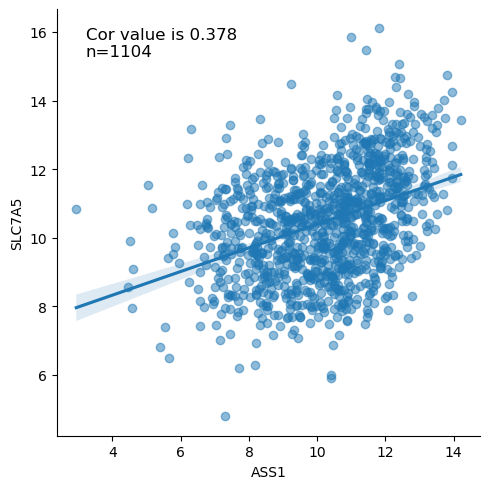

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
x = 'SLC7A5'
y = 'ASS1'
x20 = brca[x].max() / 5
y80 = brca[x].max() * 0.95
cor = brca[x].corr(brca[y])
cor = round(cor, 3)
print("Cor value is", round(cor, 3))
fgrid = sns.lmplot(x="ASS1", y="SLC7A5", data=brca, scatter_kws={"alpha":0.5})
ax = fgrid.axes[0,0]
ax.text(x20, y80, f"Cor value is {cor}\nn={len(brca)}", fontsize=12)